## BigMart Sale 

This problem statement is a part of Hackthon which is hosted by 'analytics vidhya'<br>
You can find this dataset <a href="https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/"><b>here</b></a><br>
Problem Statement: Prediction of sale

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor

In [2]:
data=pd.read_csv('E:\\Education\\Datascience\\project\\bigmartsales\\train_kOBLwZA.csv')

# Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


As you can see we have 8523 entries and 12 columns<br>
You can also see that two columns contains null values which are Item_weight and Outlet_Size 

In [4]:
data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


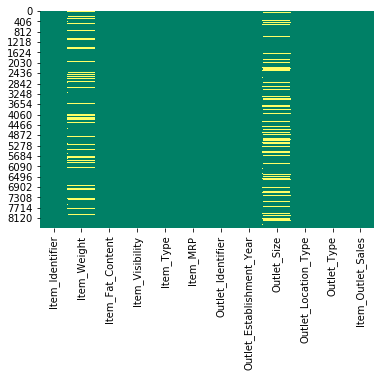

In [6]:
sns.heatmap(data.isnull(),cbar=False,cmap='summer')

In [7]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Let's handle null values

You can drop rows and columns which contain null values but it depends on number of NaN values <br>
If particular column contains more than 50% null values then you should just drop that column<br>
And if there are relatively less number of null values such as 5 or 10 then you can drop those rows <br>
<b>In our case we have to replace them with some values</b>

For continuous variables check for outliers then decide whether to replace null values with median or mean

12.857645184136183 



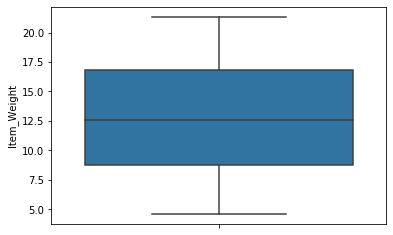

In [8]:
print(data['Item_Weight'].mean(),'\n')
sns.boxplot(y='Item_Weight',data=data)

Item_weight column does not contain outliers and mean, median is also nearly same<br>
We will replace null values with mean value if there were outliers then we should replace them with median 

In [9]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

There are two ways to replace null values in categorical variables <br>
<ol><li>Replace them with mode</li>
    <li>Replace them with specific label</li></ol>

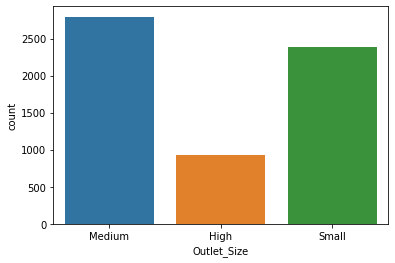

In [10]:
sns.countplot('Outlet_Size',data=data)

Here Medium and Small category count is nearly same So We should replace null values with Specific label

In [11]:
data['Outlet_Size'].fillna('Unknown',inplace=True)

In [12]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
data.duplicated().any()

False

There is no duplication of data <br>
<b>Note:</b> You can drop duplicate rows by data.drop_duplicates(inplace=True)

Now let's drop unwanted columns 

In [14]:
data.drop(['Item_Identifier','Outlet_Identifier'],inplace=True,axis=1)

Countplot of categorical column gives frequency of each label 

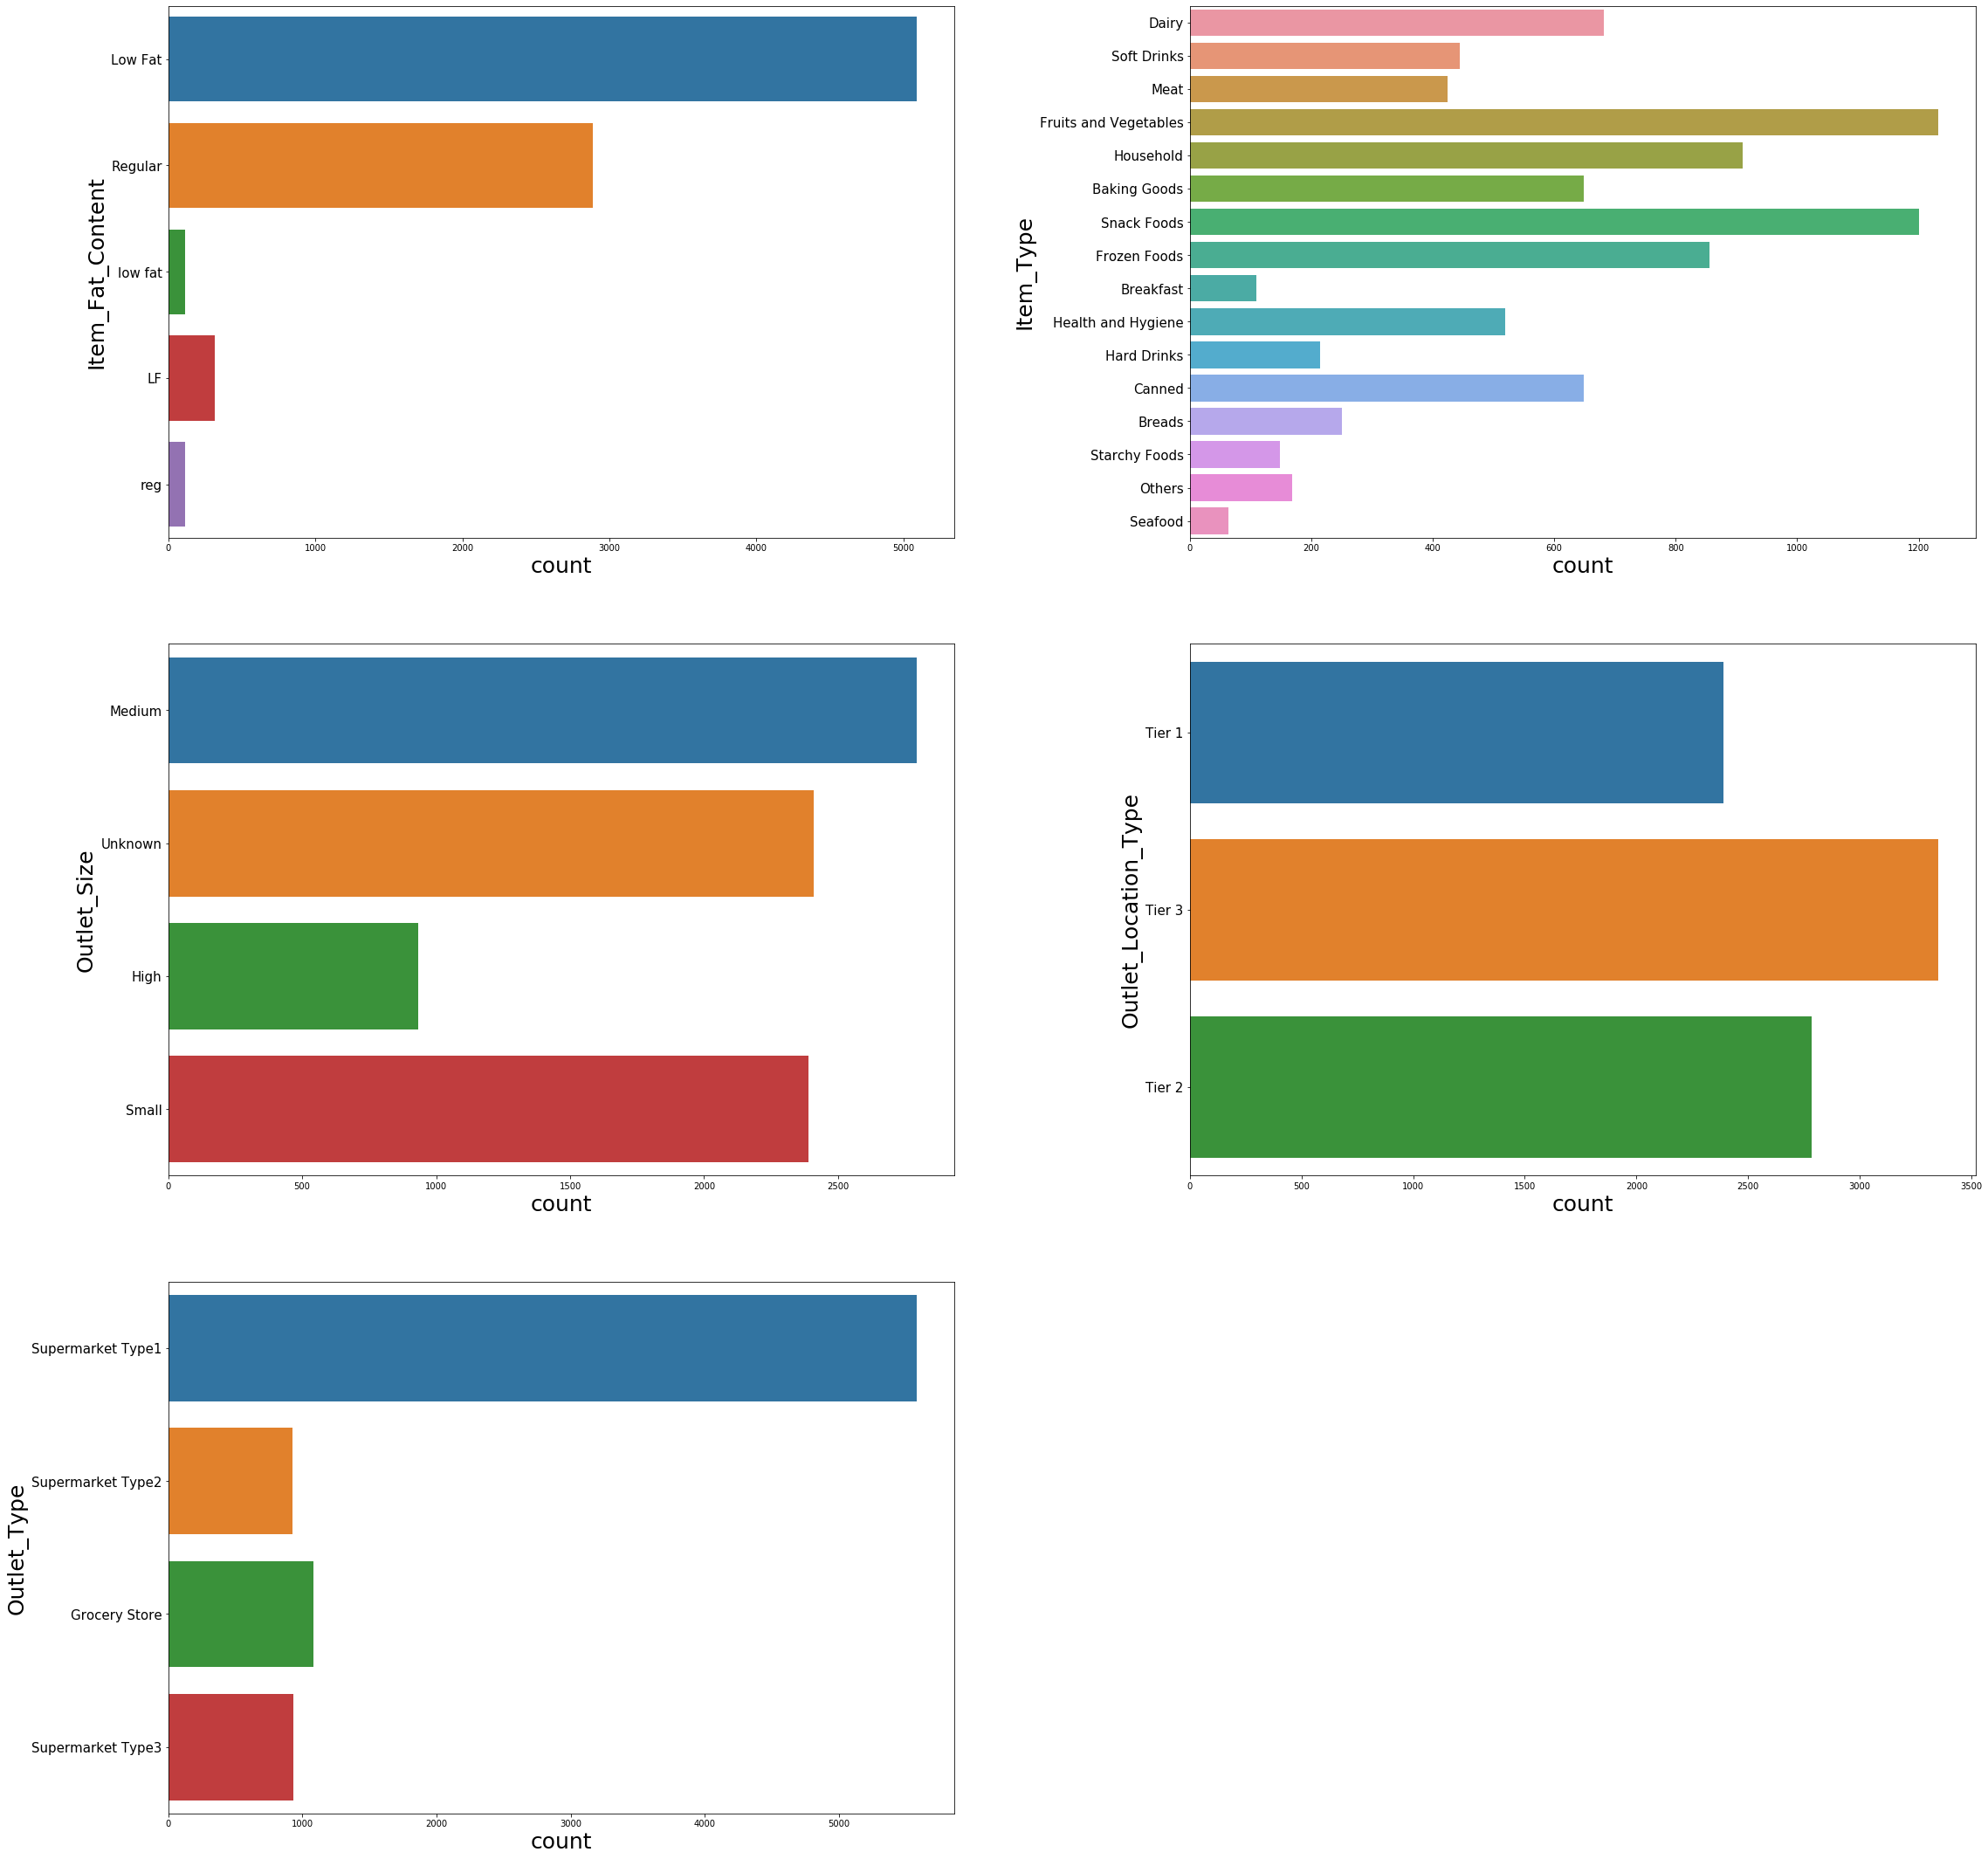

In [15]:
plt.figure(figsize=(10,10))
plt.rc('ytick', labelsize=15)        
plt.rc('axes', labelsize=25) 
plt.subplots_adjust(left=None, bottom=None, right=3, top=3, wspace=.3, hspace=None)
i=1
for column in data.select_dtypes(include='object').columns:
    plt.subplot(3,2,i)
    sns.countplot(y=column,data=data)
    i+=1

By analysing above charts you can conclude following things:<br>
<ul><li>Item_Fat_content:There is a repetation of label , Regular and reg is same and rest are Low Fat </li>
<li>Item_Type:We can see that people tend to buy Fruits,vegetables and snack food more and very less number of people buy sea food</li>
<li>Outlet_Type:People have bought more things from Supermarket Type1 than all other store and Supermarket combined</li></ul>

In [16]:
label={'low fat':'Low Fat','LF':'Low Fat','Low Fat':'Low Fat','reg':'Regular','Regular':'Regular'}
data['Item_Fat_Content']=data['Item_Fat_Content'].map(label)
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

Now let's check for outliers and anamolies in continuous columns of dataset 

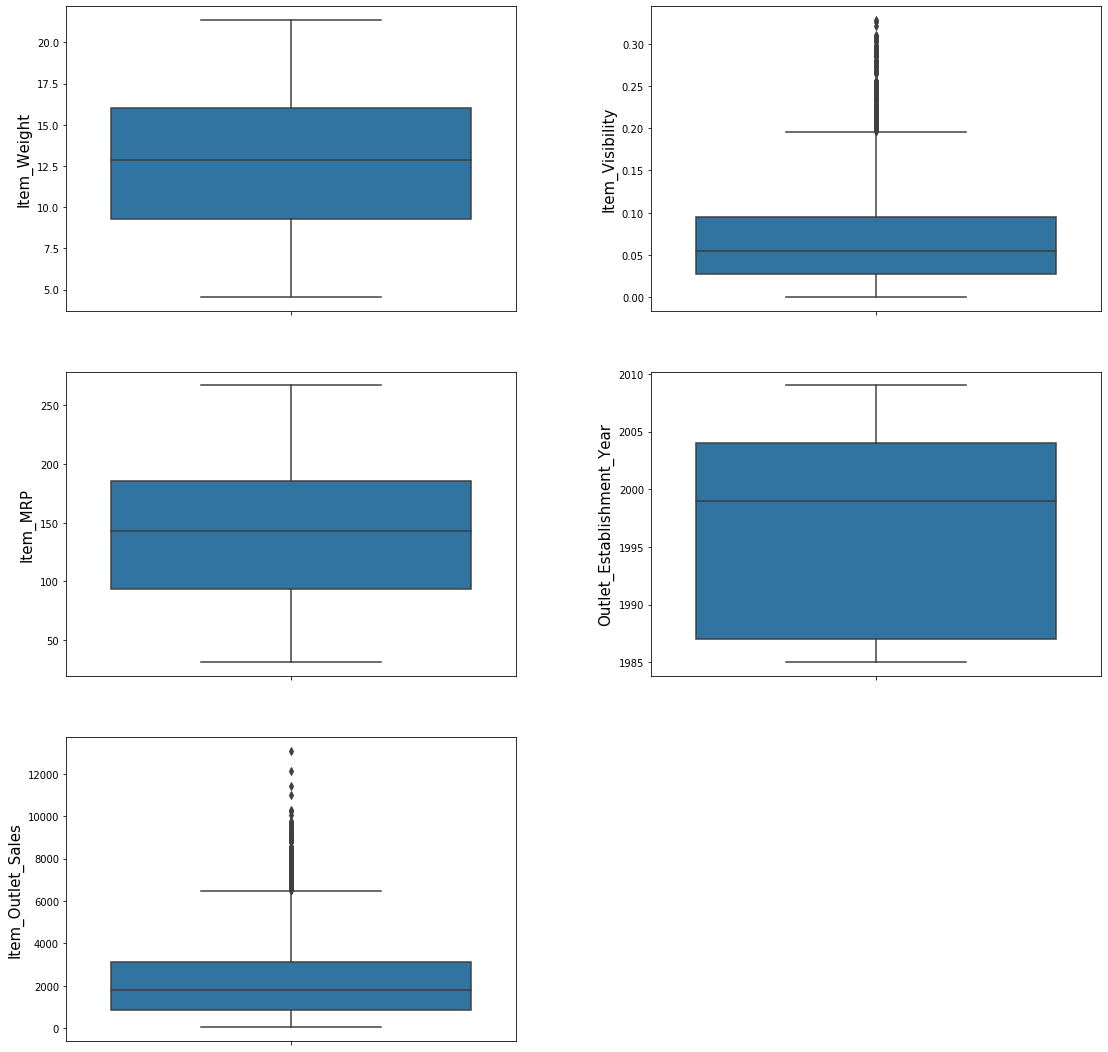

In [17]:
plt.figure(figsize=(5,5))
plt.rc('ytick', labelsize=10)        
plt.rc('axes', labelsize=15) 
plt.subplots_adjust(left=None, bottom=None, right=3, top=3, wspace=.3, hspace=None)
i=1
for column in data.select_dtypes(exclude='object').columns:
    plt.subplot(3,2,i)
    sns.boxplot(y=column,data=data)
    i+=1

We can see that Item_Visibility and Item_Outlet_Sales contains outliers<br>
But In case of Item_visibility, It will not make much impact since values are already very low and difference is not that much<br><br>
In case of Item_Outlet_Sales, Though it is a target variable but we have to remove outliers since it will effect performance of our model when we do back propagation

In [18]:
data1=data[data['Item_Outlet_Sales']<10000].copy()

In [19]:
print('total rows removed:{0}'.format(len(data)-len(data1)),'\n')
print('total rows in new dataset:{0}'.format(len(data1)))

total rows removed:8 

total rows in new dataset:8515


For checking distribution of continuous variable and relation between them we can use pairplot diagrams

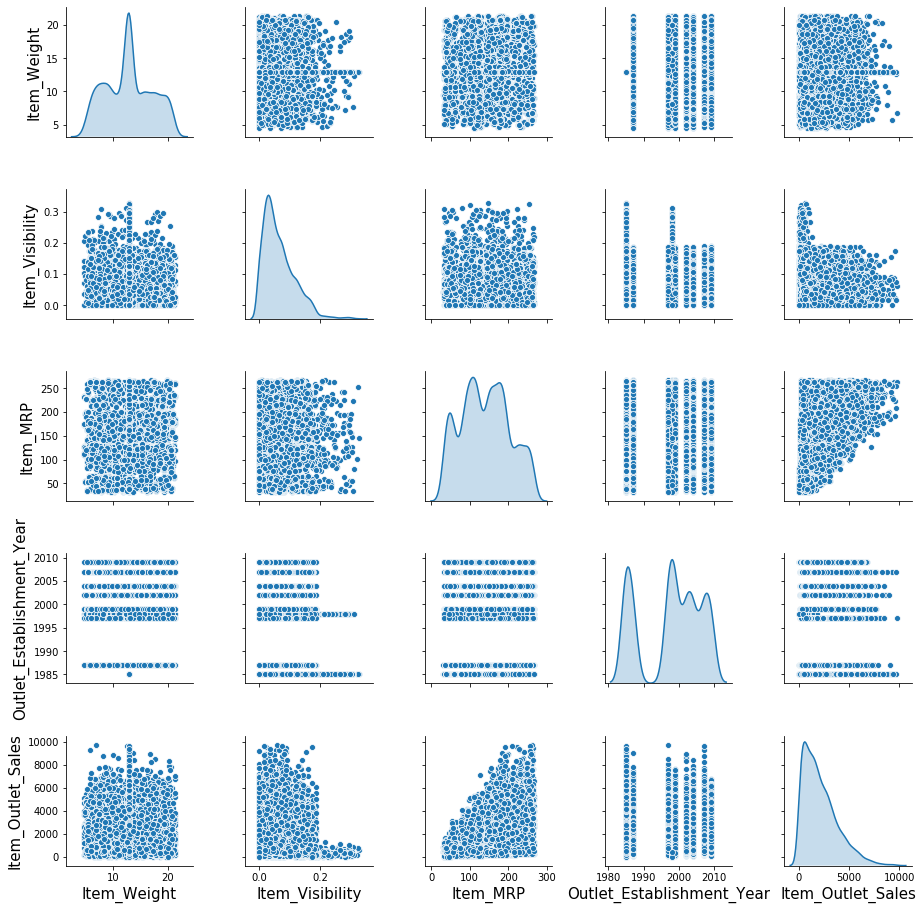

In [20]:
sns.pairplot(data1,kind='scatter',diag_kind='kde')

<ul><li>All histograms represents distribution of particalur column data, we can see that Item_Outlet_Sales values are mostly under 5000</li><li>
By analysing scatterplots with respect to Item_Outlet_Sales You can observe that there is a positive correlation between Item_MRP and Sales, And negative correlation between Item_Visibility and Sales</li><br>
You can also verify this as follow

In [21]:
data1.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012003,0.024683,-0.008238,0.011437
Item_Visibility,-0.012003,1.000000,-0.000230,-0.075913,-0.126814
Item_MRP,0.024683,-0.000230,1.000000,0.007412,0.567476
Outlet_Establishment_Year,-0.008238,-0.075913,0.007412,1.000000,-0.042365
Item_Outlet_Sales,0.011437,-0.126814,0.567476,-0.042365,1.000000


# Feature

### For Item_Type and Item_Fat_Content we will use label encoder since they have more different values and for other categorical features we will use one hot encoder

If you have categorical feature with more than four to five different values then LabelEncoder is good choice as one hot encoder will increase number of columns 

In [22]:
le=LabelEncoder()
data1['Item_Type']=le.fit_transform(data1['Item_Type'])

In [23]:
data1=pd.get_dummies(data1,columns=['Outlet_Location_Type','Outlet_Type','Outlet_Size','Item_Fat_Content'],drop_first=True)

In [24]:
data1.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Item_Fat_Content_Regular
0,9.30,0.016047,4,249.8092,1999,3735.1380,0,0,1,0,0,1,0,0,0
1,5.92,0.019278,14,48.2692,2009,443.4228,0,1,0,1,0,1,0,0,1
2,17.50,0.016760,10,141.6180,1999,2097.2700,0,0,1,0,0,1,0,0,0
3,19.20,0.000000,6,182.0950,1998,732.3800,0,1,0,0,0,0,0,1,1
4,8.93,0.000000,9,53.8614,1987,994.7052,0,1,1,0,0,0,0,0,0


In [25]:
scaler_MRP= MinMaxScaler()
data1['Item_MRP']=scaler_MRP.fit_transform(data1['Item_MRP'].to_numpy().reshape(-1, 1))

In [26]:
scaler_sales= MinMaxScaler()
data1['Item_Outlet_Sales']=scaler_sales.fit_transform(data1['Item_Outlet_Sales'].to_numpy().reshape(-1, 1))

In [27]:
target=data1['Item_Outlet_Sales']
features=data1.drop('Item_Outlet_Sales',axis=1).copy()

In [28]:
print(target.head())
features.head()

0    0.379807
1    0.042079
2    0.211763
3    0.071726
4    0.098641
Name: Item_Outlet_Sales, dtype: float64


,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Item_Fat_Content_Regular
0,9.30,0.016047,4,0.927507,1999,0,0,1,0,0,1,0,0,0
1,5.92,0.019278,14,0.072068,2009,0,1,0,1,0,1,0,0,1
2,17.50,0.016760,10,0.468288,1999,0,0,1,0,0,1,0,0,0
3,19.20,0.000000,6,0.640093,1998,0,1,0,0,0,0,0,1,1
4,8.93,0.000000,9,0.095805,1987,0,1,1,0,0,0,0,0,0


## Handle test dataset same way

In [29]:
test=pd.read_csv('E:\\Education\\Datascience\\project\\bigmartsales\\test_t02dQwI.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [30]:
submission_file=test[['Item_Identifier','Outlet_Identifier']]

In [31]:
test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [32]:
test.isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [33]:
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace=True)
test['Outlet_Size'].fillna('Unknown',inplace=True)

In [34]:
test['Item_Fat_Content']=test['Item_Fat_Content'].map(label)
test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [35]:
test=pd.get_dummies(test,columns=['Outlet_Location_Type','Outlet_Type','Outlet_Size','Item_Fat_Content'],drop_first=True)

In [36]:
test['Item_Type']=le.transform(test['Item_Type'])

In [37]:
test['Item_MRP']=scaler_MRP.transform(test['Item_MRP'].to_numpy().reshape(-1, 1))

In [38]:
test.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Item_Fat_Content_Regular
0,20.750000,0.007565,13,0.325012,1999,0,0,1,0,0,1,0,0,0
1,8.300000,0.038428,4,0.237819,2007,1,0,1,0,0,0,0,1,1
2,14.600000,0.099575,11,0.893316,1998,0,1,0,0,0,0,0,1,0
3,7.315000,0.015388,13,0.525233,2007,1,0,1,0,0,0,0,1,0
4,12.695633,0.118599,4,0.861381,1985,0,1,0,0,1,1,0,0,1


# Model Developement

In [39]:
from sklearn.model_selection import RandomizedSearchCV
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.18, 0.20],
 "max_depth"        : [ 3, 4, 5, 6, 8, 10],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4, 0.5],
 "colsample_bytree" : [ 0.4, 0.5 , 0.7 , 0.9, 0.11]
    }

In [40]:
model=XGBRegressor()

In [41]:
xgb_random_search=RandomizedSearchCV(model,param_distributions=params,n_iter=30,n_jobs=-1,cv=5)

In [42]:
xgb_random_search.fit(features,target)

[23:45:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                          seed=None, silent=None, subsample=1,
                                          verbosity=1),
                   iid='deprecated', n_iter=30, n_job

In [43]:
xgb_random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0.2,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=5, min_child_weight=7, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [44]:
xgb_model=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.3,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [45]:
xgb_model.fit(features,target)

[23:45:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.3,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [46]:
salepred=xgb_model.predict(test)

In [47]:
salepred=pd.Series(salepred)

In [48]:
final=pd.concat([submission_file,salepred],axis=1)
final.columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'] 
final['Item_Outlet_Sales']=scaler_sales.inverse_transform(final['Item_Outlet_Sales'].to_numpy().reshape(-1,1))
final.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1786.172852
1,FDW14,OUT017,1409.583374
2,NCN55,OUT010,993.712097
3,FDQ58,OUT017,2453.990967
4,FDY38,OUT027,5324.160156


In [49]:
final.to_csv('final.csv',index=False)

Baseline model performed well, error was 1165 and top entry on the leader board has error of around 1130

We can surely get that if we use Deep Learning model with DNN layers